In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data Cleaning

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape') 

In [8]:
df.shape

(11251, 15)

In [10]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [16]:
df.drop(['Status', 'unnamed1'], axis=1,inplace= True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [18]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(11239, 13)

In [22]:
df['Amount'] = df['Amount'].astype('int')

In [23]:
df['Amount'].dtypes

dtype('int32')

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [26]:
df.rename(columns = {'Marital_Status' : 'shaddi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,shaddi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [31]:
df[['Amount','Age']].describe()

,Amount,Age
count,11239.000000,11239.000000
mean,9453.610553,35.410357
std,5222.355168,12.753866
min,188.000000,12.000000
25%,5443.000000,27.000000
50%,8109.000000,33.000000
75%,12675.000000,43.000000
max,23952.000000,92.000000


In [34]:
df[['Age', 'Amount']].max()

Age          92
Amount    23952
dtype: int64

# EDA

Gender

In [35]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

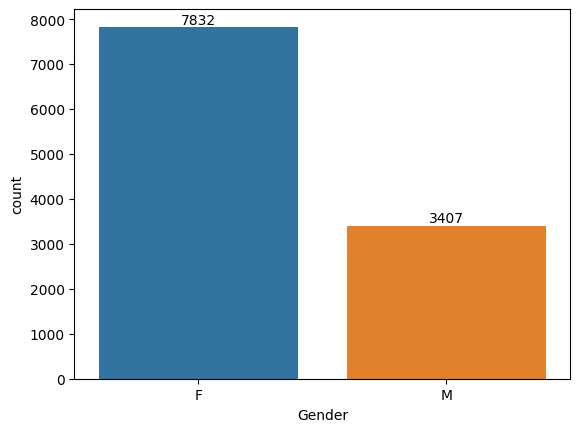

In [45]:
ax = sns.countplot(x='Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

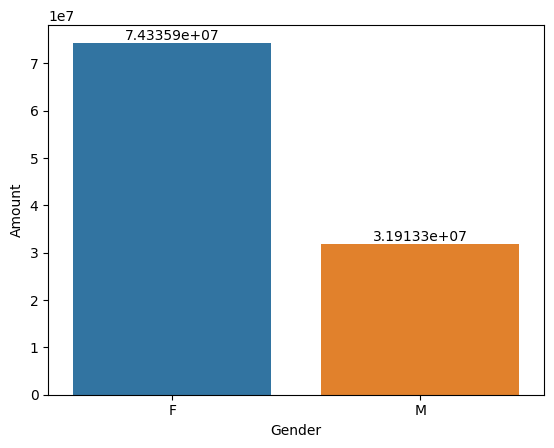

In [85]:
sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

p= sns.barplot(x = 'Gender', y= 'Amount', data = sales_gender, errwidth=0)

for i in p.containers:
    p.bar_label(i)

##### Most of the buyer are females and even purchasing power of female are greater than men


# Age

In [10]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

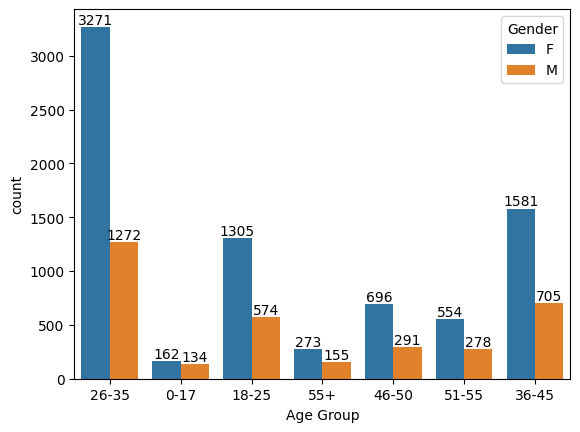

In [9]:
ax = sns.countplot(x='Age Group', data=df, hue="Gender")

for bars in ax.containers:
    ax.bar_label(bars)

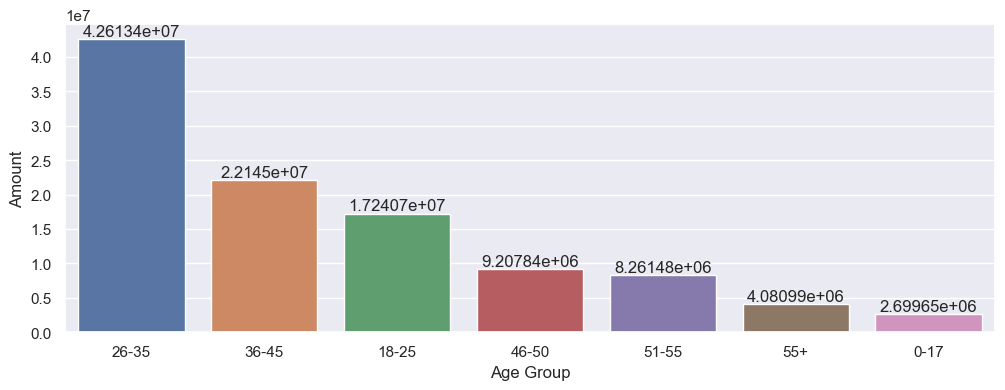

In [6]:
sales_Age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(12,4)})
p= sns.barplot(x = 'Age Group', y= 'Amount', data =sales_Age, errwidth=0)

for i in p.containers:
    p.bar_label(i,)

##### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

# State

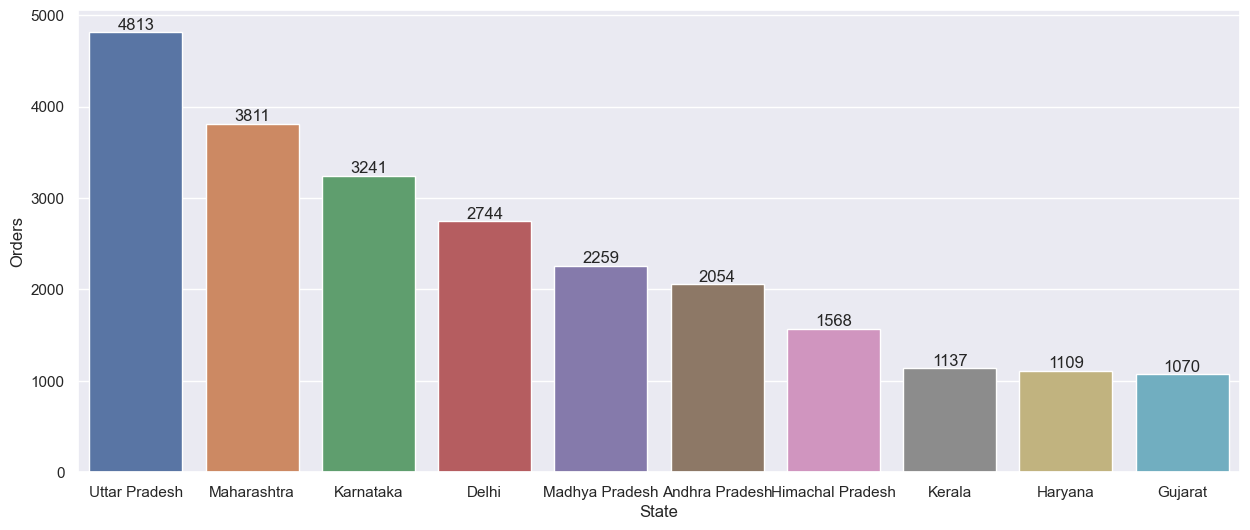

In [21]:
sales_State = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,6)})

p= sns.barplot(x = 'State', y= 'Orders', data =sales_State, errwidth=0)

for i in p.containers:
    p.bar_label(i,)

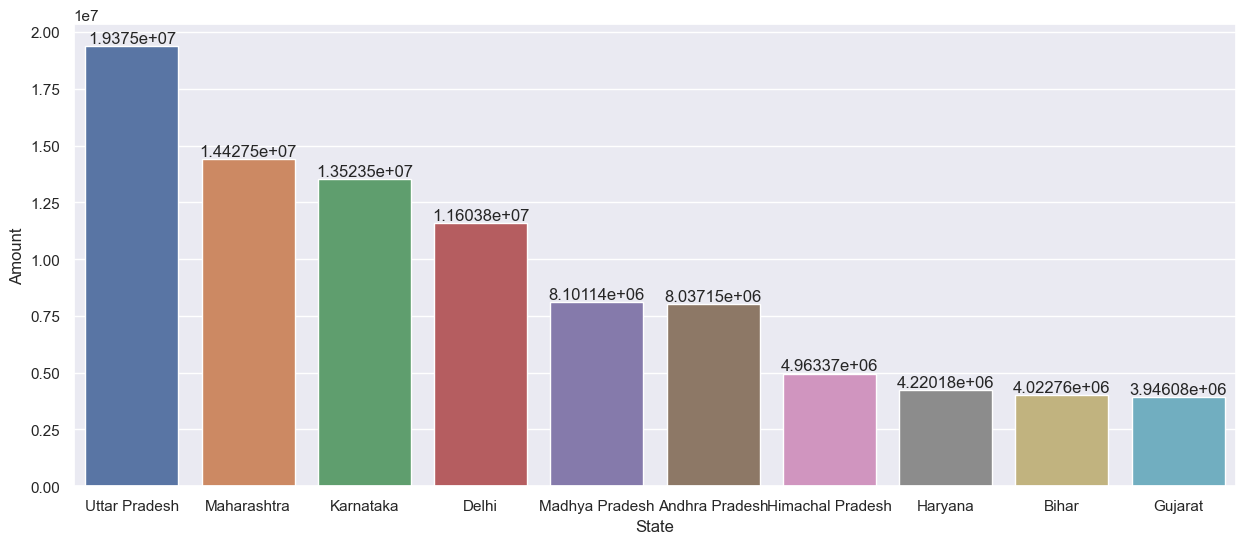

In [22]:
sales_State = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,6)})

p= sns.barplot(x = 'State', y= 'Amount', data =sales_State, errwidth=0)

for i in p.containers:
    p.bar_label(i,)

##### From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

# Marital_Status

In [32]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

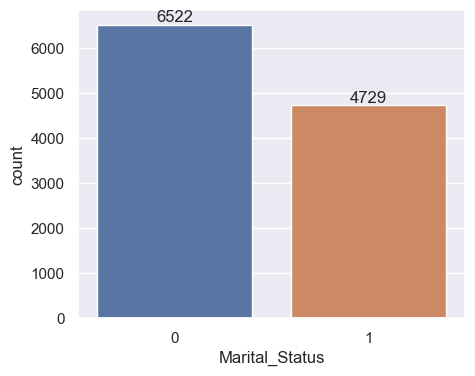

In [39]:
ax = sns.countplot(x='Marital_Status', data=df)

sns.set(rc={'figure.figsize':(5,4)})

for bars in ax.containers:
    ax.bar_label(bars)

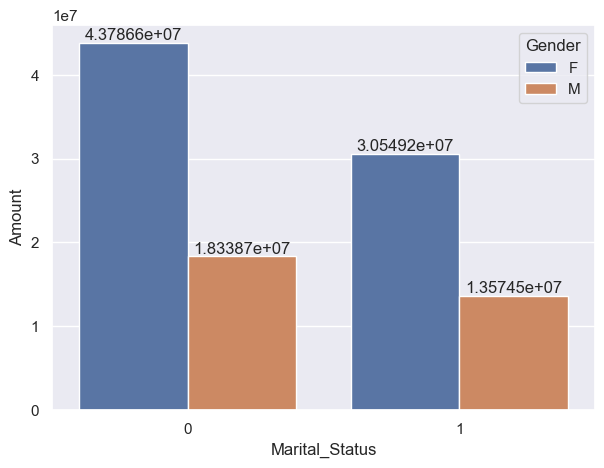

In [48]:
sales_Marital_Status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(7,5)})

p= sns.barplot(x = 'Marital_Status', y= 'Amount', data =sales_Marital_Status, hue='Gender', errwidth=0)

for i in p.containers:
    p.bar_label(i,)

###### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

# Occupation

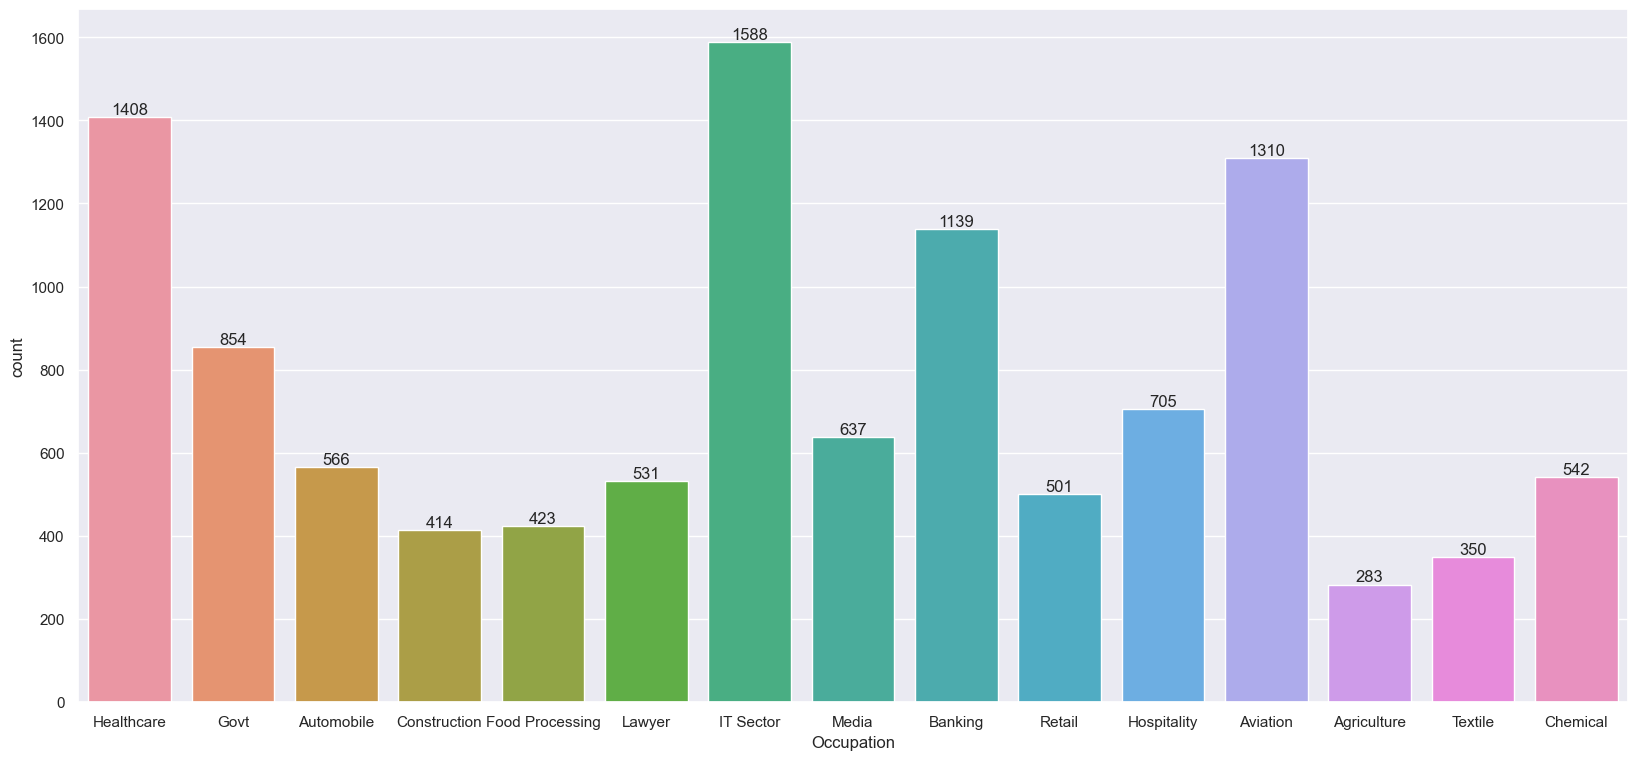

In [50]:
ax = sns.countplot(x='Occupation', data=df)

sns.set(rc={'figure.figsize':(20,15)})

for bars in ax.containers:
    ax.bar_label(bars)

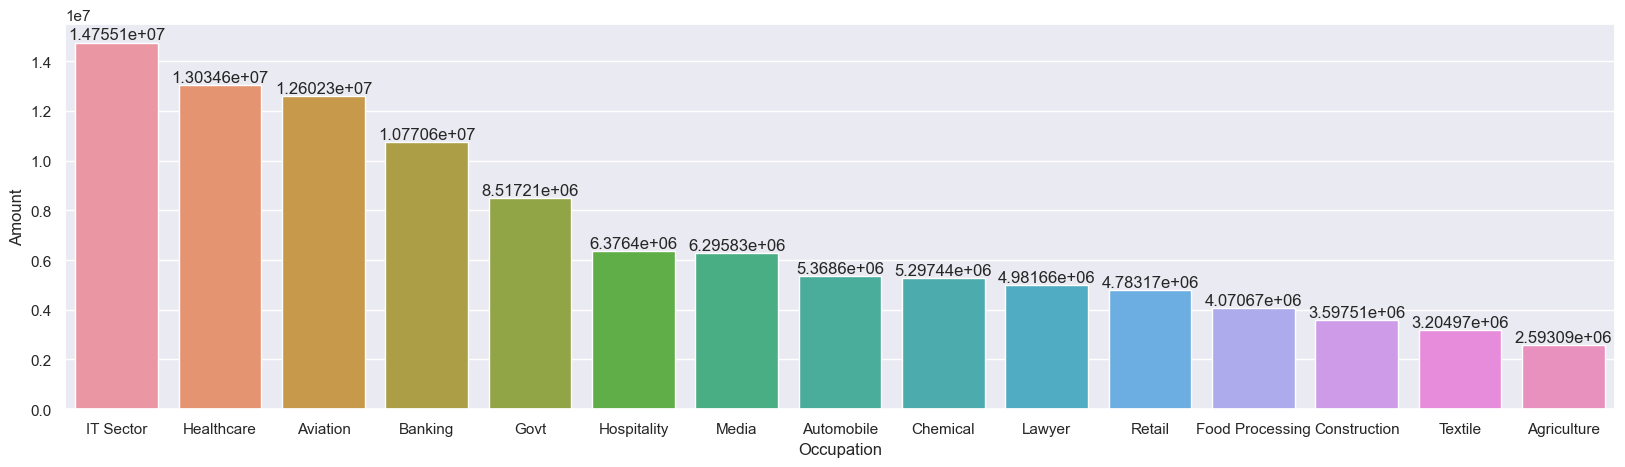

In [15]:
sales_Occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})

p= sns.barplot(x = 'Occupation', y= 'Amount', data =sales_Occupation, errwidth=0)

for i in p.containers:
    p.bar_label(i,)

##### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

# Product_Category

In [54]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

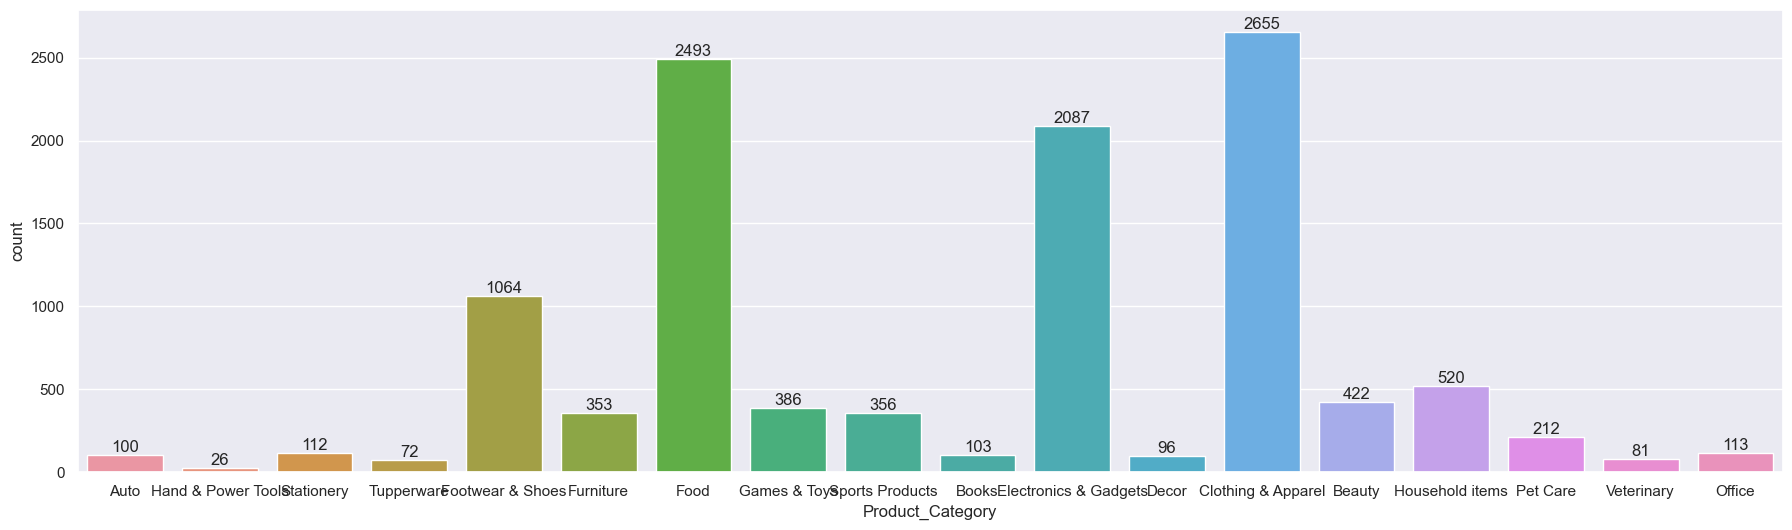

In [14]:
ax = sns.countplot(x='Product_Category', data=df)

sns.set(rc={'figure.figsize':(20,4)})

for bars in ax.containers:
    ax.bar_label(bars)

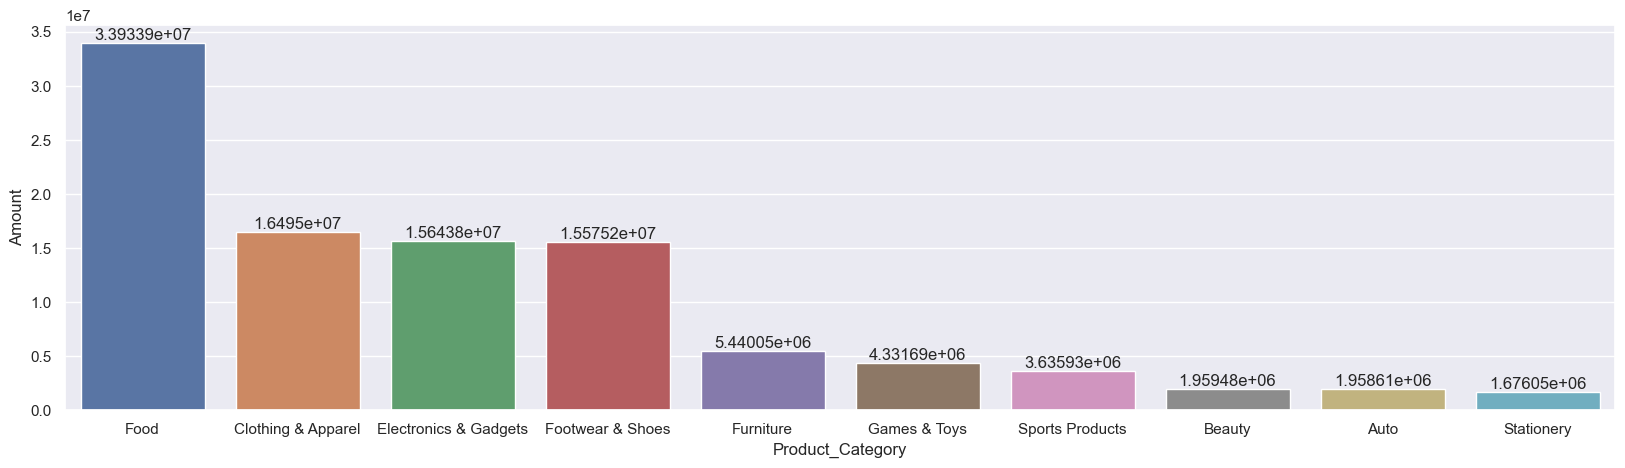

In [16]:
sales_Occupation = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})

p= sns.barplot(x = 'Product_Category', y= 'Amount', data =sales_Occupation, errwidth=0)

for i in p.containers:
    p.bar_label(i,)

##### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

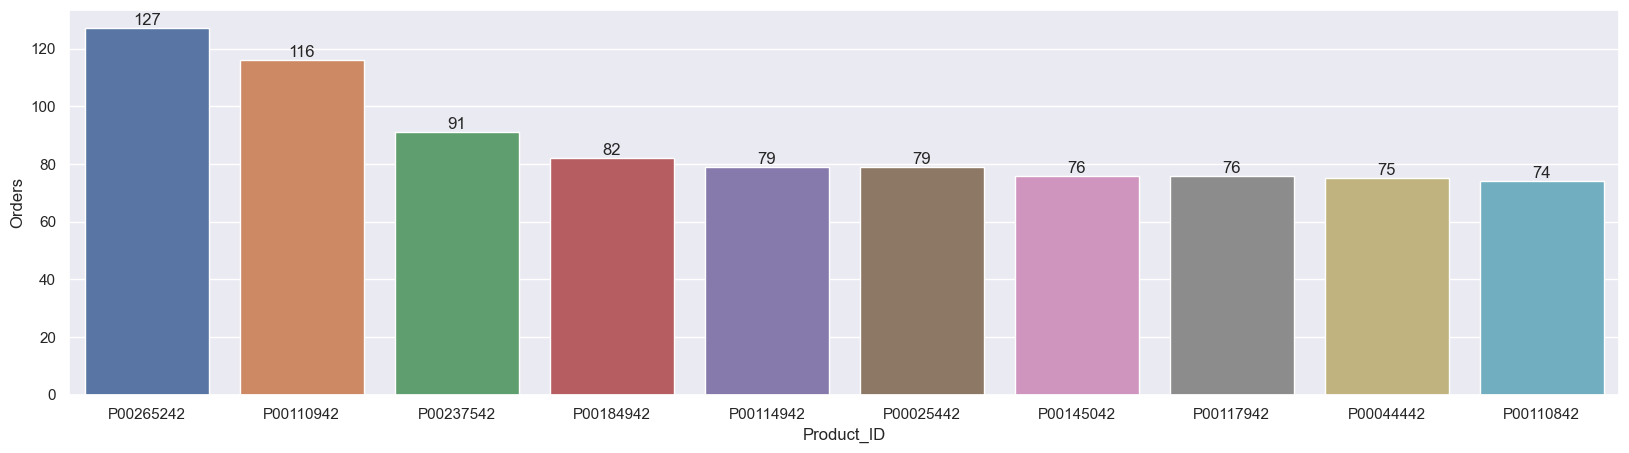

In [61]:
sales_Occupation = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})

p= sns.barplot(x = 'Product_ID', y= 'Orders', data =sales_Occupation, errwidth=0)

for i in p.containers:
    p.bar_label(i,)

# Conclusion:

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category